In [1]:
# imports
import sys
import pandas as pd
sys.path.append('../../') # to access the files in higher directories
sys.path.append('../') # to access the files in higher directories
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import core_exp as cx
import core_calib as cal

In [2]:
params = {
    # exp
    "exp_name": "play",
    "runs": 10,
    "plot": True,
    "calib_methods": ["RF", "Platt", "ISO", "Rank", "CRF", "VA", "Beta", "Elkan", "tlr", "Line", "RF_boot", "RF_ens_r", "RF_large", "RF_ens_line", "RF_ens_CRF", "RF_ens_Platt", "RF_large_line"],
    "metrics": ["acc", "tce", "logloss", "brier", "ece", "auc"],
    
    #data
    "data_name": "synthetic",
    "data_size": 1000,
    "n_features": 2,

    "class1_mean_min":0, 
    "class1_mean_max":1,
    "class2_mean_min":1, 
    "class2_mean_max":3, 

    "test_split": 0.3,
    "calib_split": 0.1,

    # calib param
    "ece_bins": 40,
    "boot_size": 5000,
    "boot_count": 40,

    # RF hyper opt
    "hyper_opt": True,
    "opt_cv":5, 
    "opt_n_iter":10,
    "search_space": {
                    "n_estimators": [10],
                    "max_depth": [2,3,4,5,6,7,8,10,20,50,100],
                    "criterion": ["gini", "entropy"],
                    # "min_samples_split": [2,3,4,5],
                    # "min_samples_leaf": [1,2,3],
                    },
}
exp_key = "boot_count"
exp_values = [5]

In [3]:
calib_results_dict, data_list = cx.run_exp(exp_key, exp_values, params)
tables = cal.mean_and_ranking_table(calib_results_dict, 
                                    params["metrics"], 
                                    params["calib_methods"], 
                                    data_list, 
                                    mean_and_rank=False, 
                                    std=True)

In [4]:
tables["tce"]

,RF,Platt,ISO,Rank,CRF,VA,Beta,Elkan,tlr,Line,RF_boot,RF_ens_r,RF_large,RF_ens_line,RF_ens_CRF,RF_ens_Platt,RF_large_line
Data,,,,,,,,,,,,,,,,,
5,0.009696,0.013129,0.019297,0.026971,0.009532,0.015568,0.014463,0.134773,0.021739,0.013044,0.00968,0.006772,0.007181,0.00734,0.00654,0.010493,0.007544


In [5]:
plot_calib_methods = params["calib_methods"].copy()
# plot_calib_methods.remove("Rank")
# plot_calib_methods.remove("Elkan")
# plot_calib_methods.remove("RF")
plot_calib_methods

['RF',
 'Platt',
 'ISO',
 'Rank',
 'CRF',
 'VA',
 'Beta',
 'Elkan',
 'tlr',
 'Line',
 'RF_boot',
 'RF_ens_r',
 'RF_large',
 'RF_ens_line',
 'RF_ens_CRF',
 'RF_ens_Platt',
 'RF_large_line']

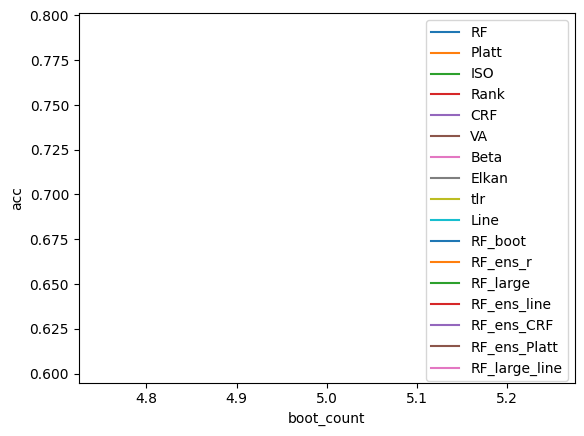

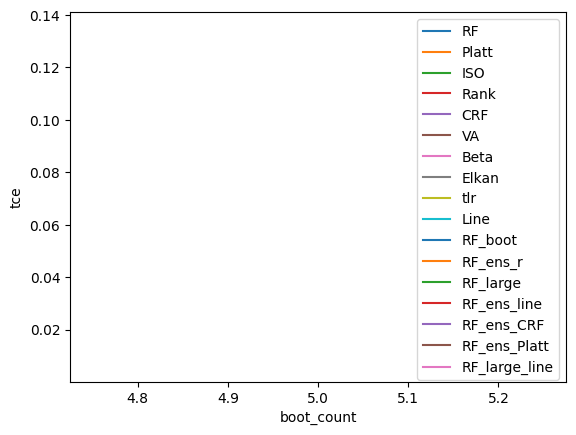

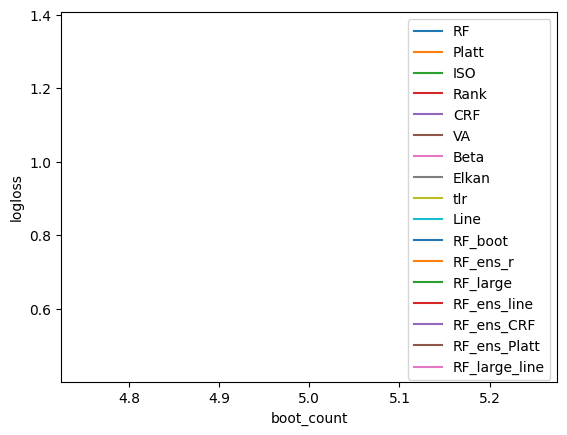

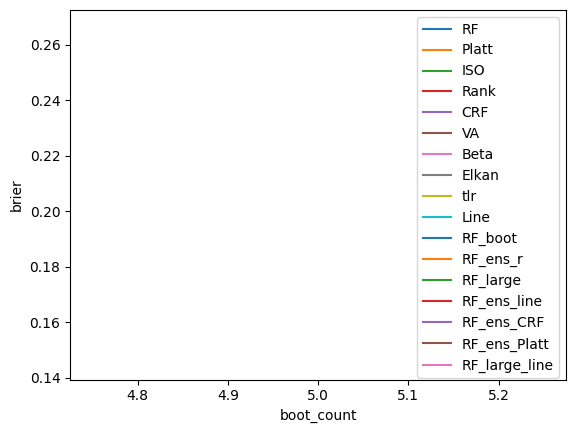

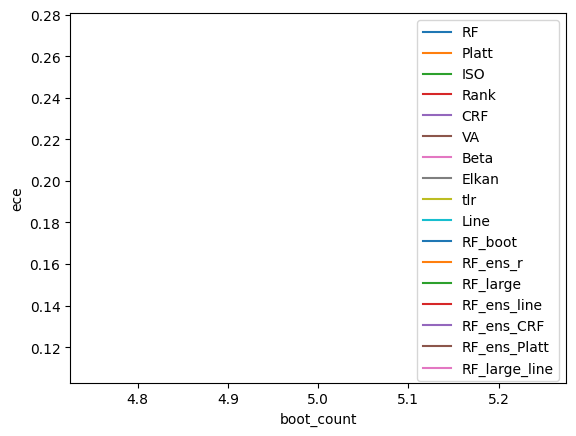

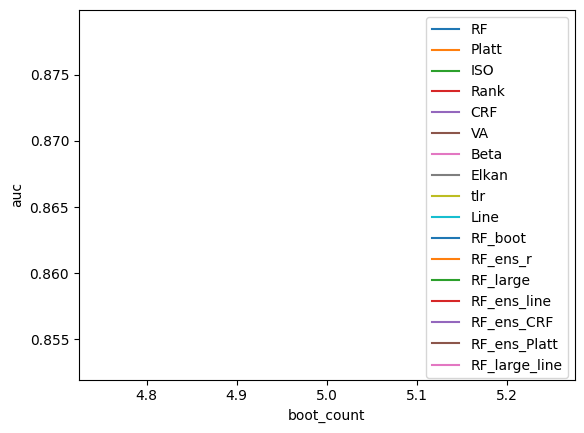

In [6]:
for metric in params["metrics"]:
    ax = tables[metric][plot_calib_methods].plot()
    ax.set_xlabel(exp_key)
    ax.set_ylabel(metric)